<a href="https://colab.research.google.com/github/BrianMotta02/Transfer-Learning-em-Python/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [9]:
from tensorflow.keras.utils import get_file

url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path = get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

dataset_path = path.replace('.zip', '')
train_dir = f"{dataset_path}/train"
validation_dir = f"{dataset_path}/validation"


In [10]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
base_model = MobileNetV2(input_shape=(150, 150, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


<ipython-input-11-49f4b6c45966>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3),


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [12]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8559 - loss: 0.3170 - val_accuracy: 0.9490 - val_loss: 0.1308
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.9279 - loss: 0.1652 - val_accuracy: 0.9480 - val_loss: 0.1302
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 61s 949ms/step - accuracy: 0.9314 - loss: 0.1666 - val_accuracy: 0.9440 - val_loss: 0.1291
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.9316 - loss: 0.1649 - val_accuracy: 0.9550 - val_loss: 0.1190
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 80s 979ms/step - accuracy: 0.9449 - loss: 0.1429 - val_accuracy: 0.9530 - val_loss: 0.1213
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 961ms/step - accuracy: 0.9340 - loss: 0.1587 - val_accuracy: 0.9590 - val_loss: 0.1155
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 63s 984ms/step - accuracy: 0.9519 - loss: 0.1265 - val_accuracy: 0.9470 - val_loss: 0.1444
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 62s 961ms/step - accuracy: 0.9414 - loss: 0.1404 - val_accuracy: 0.9500 - val_l

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 542ms/step - accuracy: 0.9436 - loss: 0.1369
Loss: 0.12405908107757568
Accuracy: 0.9490000009536743


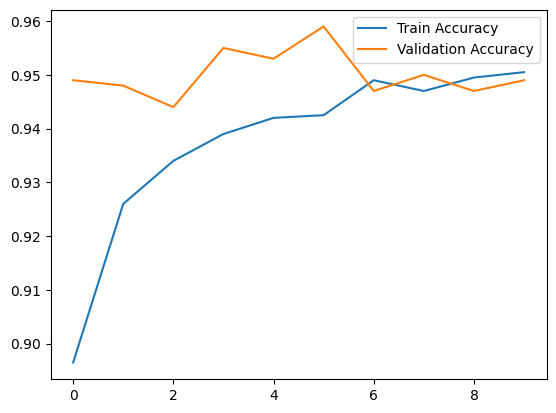

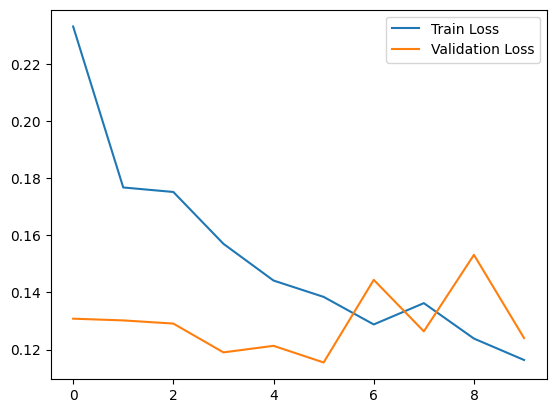

In [13]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [14]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fine_tune = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.8203 - loss: 0.3640 - val_accuracy: 0.9500 - val_loss: 0.1134
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.8985 - loss: 0.2452 - val_accuracy: 0.9570 - val_loss: 0.1121
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.9249 - loss: 0.1860 - val_accuracy: 0.9560 - val_loss: 0.1091
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9389 - loss: 0.1429 - val_accuracy: 0.9590 - val_loss: 0.1079
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 205s 3s/step - accuracy: 0.9370 - loss: 0.1540 - val_accuracy: 0.9570 - val_loss: 0.1123


In [16]:
from tensorflow.keras.utils import load_img, img_to_array

img = load_img("/IMAGES/cat.2003.jpg", target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("Cachorro")
else:
    print("Gato")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Gato
